# Exploratory Data Analysis

In order to prepare for our modeling, we will check which features are corolated with "price", check the feature's distribution, and look for collinear features.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/cleaned_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,yr_sold,yr_since_renovation,yr_since_built,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,2014,59.0,59,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,2014,23.0,63,1
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2015,82.0,82,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,2014,49.0,49,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,2015,28.0,28,0


In [3]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,yr_sold,yr_since_renovation,yr_since_built,renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,2014.322962,41.377830,43.323286,0.034449
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,0.467619,28.950873,29.377285,0.182384
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,2014.000000,-1.000000,-1.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,2014.000000,16.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,2014.000000,37.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2015.000000,61.000000,63.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,2015.000000,115.000000,115.000000,1.000000


# Which Features are Corolated with the Target

We plot each variable against "price", our target, to see what relationship they have.

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

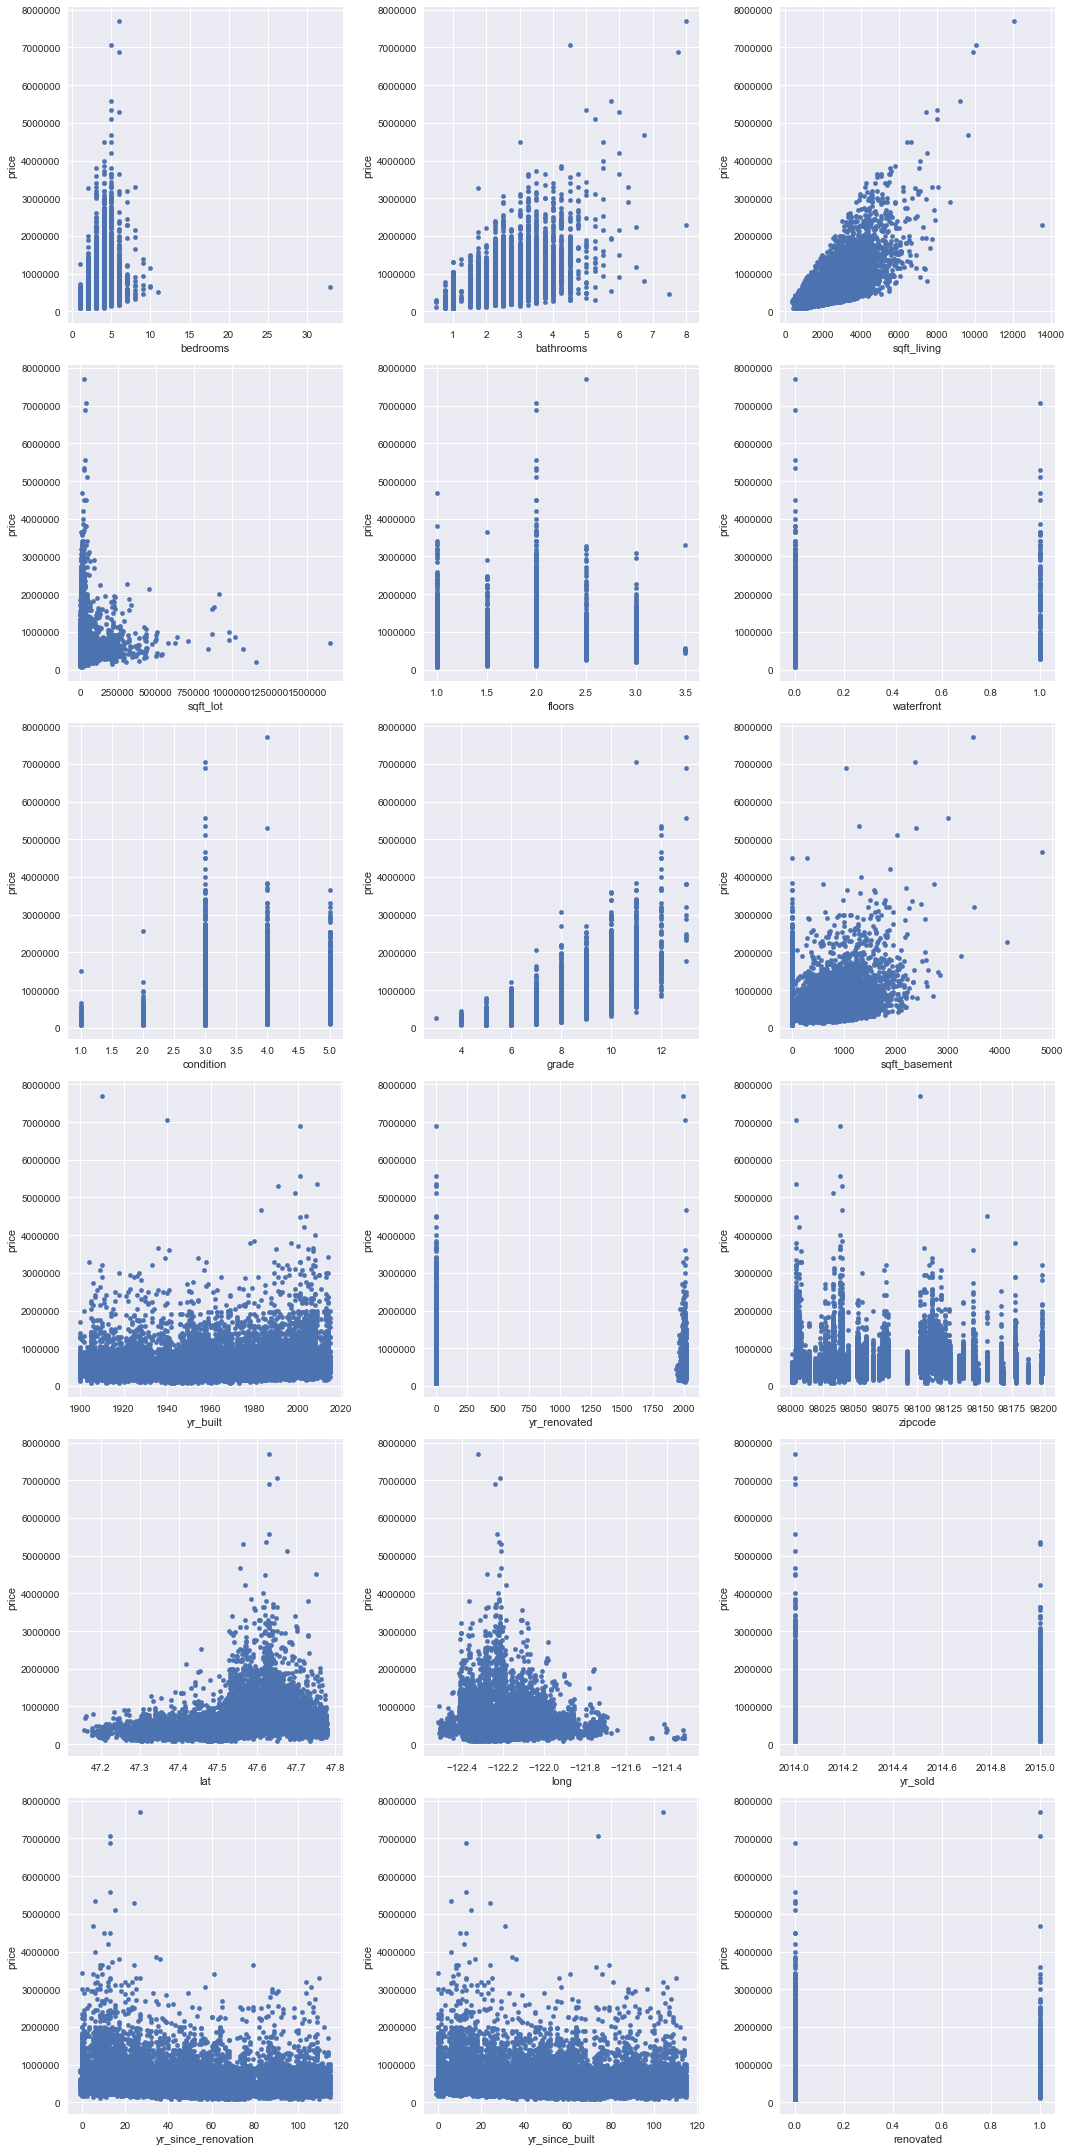

In [5]:
plt.figure(figsize=(15,30))
for i, col in enumerate(df.drop('price', axis=1).columns):
    ax = plt.subplot(6, 3, i+1)
    df.plot.scatter(x=col, y='price', ax=ax, legend=False)
plt.tight_layout()
plt.savefig(f'figures/scatter-plots.png')
plt.show()

These columns have a strong obvious corellation with price:
    - bedrooms
    - bathrooms
    - sqft_living
    - sqft_lot
    - sqft_basement
    - yr_built
    
These columns are to be treated as categorical data:
    - Condition
    - Grade
    - Zip Code
    
These columns do not appear to have a strong linear corellation:
    - Waterfront
    - lat
    - long
    - yr_sold
    - yr_since_renovation
    - yr_since_built
    - renovated
    
We don't need to remove any data yet, as uncorellated data will appear with high p-values when we run our model.

# Features to Transform

A histogram of each variable will show us their distribution. If they aren't normal, they will need to be log transformed. This will also make clearer which of our variables are continuous.

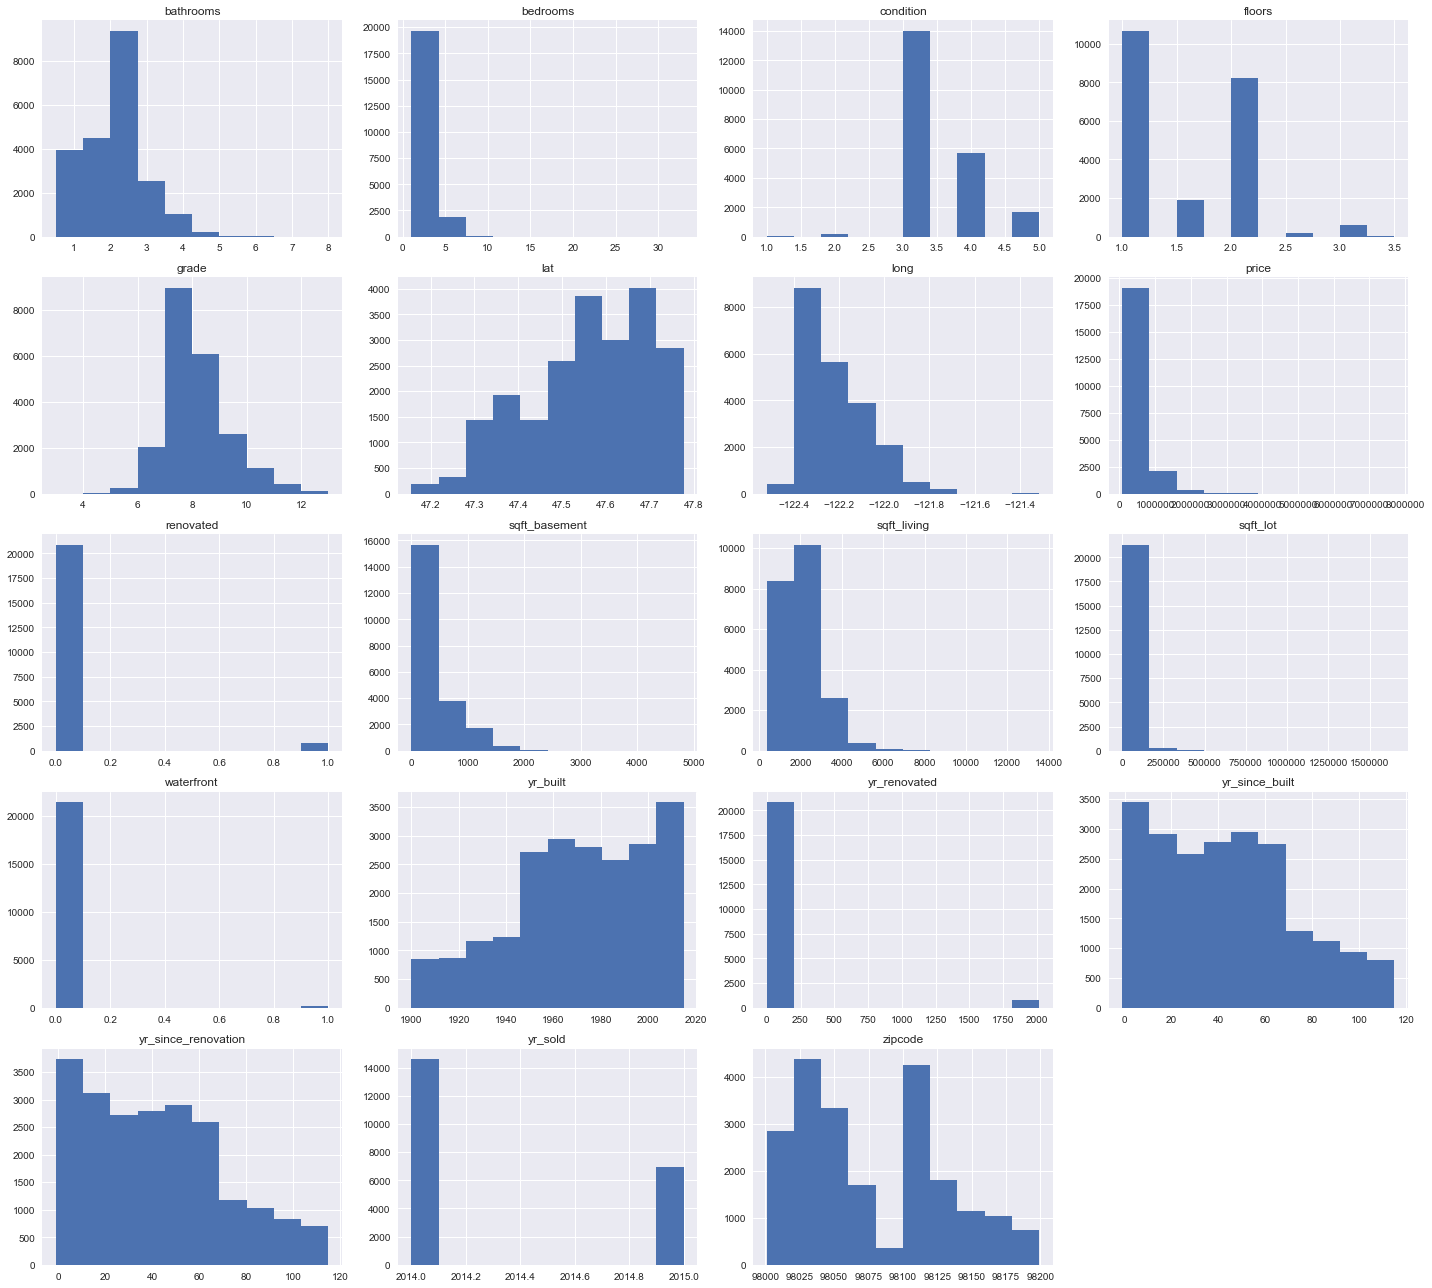

In [6]:
df.hist(figsize = (20,18))
plt.tight_layout()
plt.savefig(f'figures/histogram-plots.png')
plt.show()

The only seemingly normal distribution is "grade". We will need to log transform all continuous variables.

continuous variables:
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- sqft_basement
- lat
- long
- yr_since_built

In [7]:
df.yr_sold.value_counts()

2014    14622
2015     6975
Name: yr_sold, dtype: int64

Data is only for 2 years, so this column is unlikely to help us. We will go ahead and drop this feature.

There are also two variables in particular - price and bedrooms - where the range is far greater than the average (i.e. there are many outliers). For price, this is expected, although it will need to be dealt with in order to get a more accurate model.

In [8]:
df[df['bedrooms']>15]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,yr_sold,yr_since_renovation,yr_since_built,renovated
15856,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,580.0,1947,0.0,98103,47.6878,-122.331,2014,67.0,67,0


For bedrooms, this is unexpected. It turns out this whole thing is caused by one data point. Given the square footage and number of bathrooms in the house is not near enough for 33 bedrooms, we believe this to be an typo, and will correct this to 3 bedrooms in our iterative modeling process. Here is what the bedrooms histogram should look like without this one error.

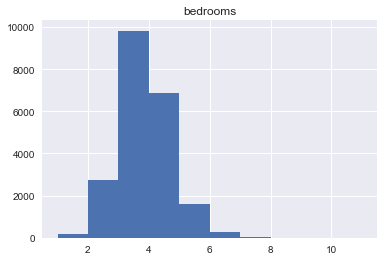

In [9]:
df.at[15856, 'bedrooms'] = 3
df.hist('bedrooms')
plt.show()

# What Features are Colinear

Here we check which features are colinear. We don't want colinear pairs, and will drop one from each pair.

In [10]:
import seaborn as sns

In [11]:
corr = df.drop('price' , axis=1).corr()

df_corr=corr.abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr[(df_corr.cc>.8) & (df_corr.cc <1)]

,cc
pairs,
"(yr_renovated, renovated)",0.999968
"(yr_built, yr_since_built)",0.999873
"(yr_since_renovation, yr_since_built)",0.926424
"(yr_since_renovation, yr_built)",0.926173


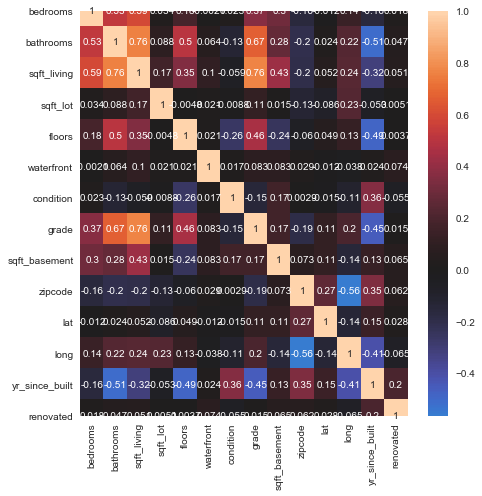

In [17]:
plt.figure(figsize=(7, 7))
sns.heatmap(corr, center=0, annot=True);
plt.tight_layout()
plt.savefig(f'figures/heatmap-before.png')
plt.show()

In order to remove collinearity, we will drop the yr_since_renovation, yr_built and the yr_renovated columns. These are also incorporated into other features, renovated and yr_since_built, so they will be safe to remove.

In [13]:
corr = df.drop(['price', 'yr_built', 'yr_renovated', 'yr_sold', 'yr_since_renovation'] , axis=1).corr()

df_corr=corr.abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr[(df_corr.cc>.8) & (df_corr.cc <1)]

,cc
pairs,


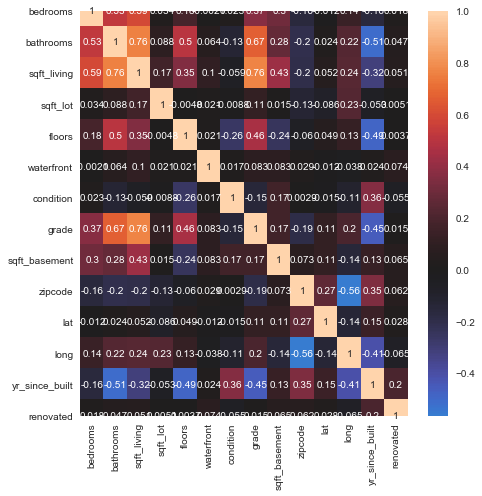

In [18]:
plt.figure(figsize=(7, 7))
sns.heatmap(corr, center=0, annot=True);
plt.tight_layout()
plt.savefig(f'figures/heatmap-after.png')
plt.show()

We check for colinearity after removing the stated features to verify we no longer have any strongly colinear features. We will be sure to remove these columns once we begin our iterative modeling process.